# Homework6 - datatalks.club - Rui Pinto

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

### Dataset

In [2]:
#!wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

In [3]:
df = pd.read_csv('jamb_exam_results.csv')
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


### Preparing the dataset

- Remove the student_id column.
- Fill missing values with zeros.
- Do train/validation/test split with 60%/20%/20% distribution.
- Use the train_test_split function and set the random_state parameter to 1.
- Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
#remove student_id
df = df.drop('student_id', axis=1).fillna(0)

df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,15,Male,High,0,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,22,Female,Medium,Tertiary,1


In [6]:
df.isna().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [7]:
# features and target
X = df.drop('jamb_score', axis=1)
y = df['jamb_score']

#train/valitation/test split 60% 20% 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

#convert to dictionary
train_dict = X_train.to_dict(orient='records')
val_dict = X_val.to_dict(orient='records')
test_dict = X_test.to_dict(orient='records')


dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)
X_test = dv.transform(test_dict)

In [8]:
X_train

array([[ 0.,  1., 21., ...,  0., 20.,  3.],
       [ 0.,  1., 22., ...,  1., 11.,  2.],
       [ 0.,  1., 19., ...,  0., 31.,  1.],
       ...,
       [ 0.,  1., 16., ...,  1., 17.,  4.],
       [ 1.,  0., 21., ...,  0., 25.,  2.],
       [ 0.,  1., 17., ...,  0., 18.,  2.]])

## Question 1
Let's train a decision tree regressor to predict the jamb_score variable.

- Train a model with max_depth=1.

Which feature is used for splitting the data?

- study_hours_per_week
- attendance_rate
- teacher_quality
- distance_to_school

In [9]:
# instantiate the DecisionTreeClassifier class with max_depth=1
dt = DecisionTreeClassifier(max_depth=1)

# train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [10]:
# checking splitting criteria for depth=1
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- study_hours_per_week <= 18.50
|   |--- class: 118
|--- study_hours_per_week >  18.50
|   |--- class: 190



## Question 2
Train a random forest regressor with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on the validation data?

- 22.13
- 42.13
- 62.13
- 82.12

In [11]:
# train a random regressor
rg = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

# fit the model
rg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [12]:
rg.score(X_val, y_val) #closest response is 22.13

0.23403819120267289

## Question 3
Now let's experiment with the n_estimators parameter

- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

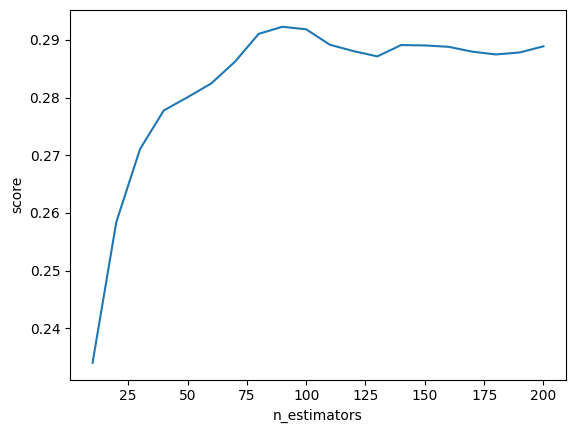

In [13]:
scores = []

for step in range(10, 201, 10):
    rg = RandomForestRegressor(n_estimators=step, random_state=1, n_jobs=-1)
    rg.fit(X_train, y_train)
    score = rg.score(X_val, y_val)
    scores.append((step, score))
    
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'score'])

plt.plot(df_scores.n_estimators, df_scores.score)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

## Question 4
Let's select the best max_depth:

- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values,
    - try different values of n_estimators from 10 till 200 (with step 10)
    - calculate the mean RMSE
- Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

- 10
- 15
- 20
- 25

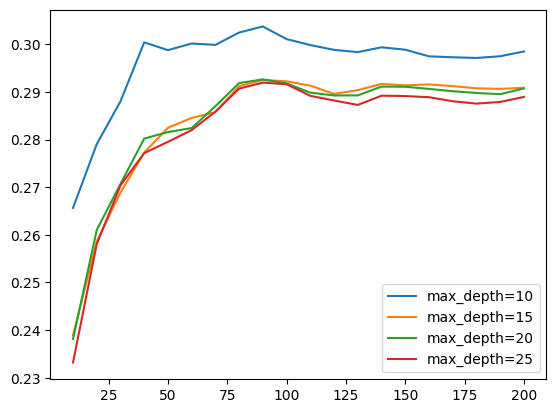

In [14]:
max_depths = [10, 15, 20, 25]

for deph in max_depths:
    scores = []
    for step in range(10, 201, 10):
        rg = RandomForestRegressor(n_estimators=step, max_depth=deph, random_state=1, n_jobs=-1)
        rg.fit(X_train, y_train)
        score = rg.score(X_val, y_val)
        scores.append((step, score))
    df_scores = pd.DataFrame(scores, columns=['n_estimators', 'score'])
    plt.plot(df_scores.n_estimators, df_scores.score, label=f'max_depth={deph}')

plt.legend()
plt.show()

## Question 5
We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

- Train the model with these parameters:
 - n_estimators=10,
 - max_depth=20,
 - random_state=1,
 - n_jobs=-1 (optional)
- Get the feature importance information from this model

What's the most important feature (among these 4)?

- study_hours_per_week
- attendance_rate
- distance_to_school
- teacher_quality

In [15]:
rf = RandomForestRegressor(n_estimators=10, 
                           max_depth=20, 
                           random_state=1, 
                           n_jobs=-1)

rf.fit(X_train, y_train)

rf.score(X_test, y_test)

# feature importance
importances = rf.feature_importances_
features = dv.get_feature_names_out()

df_fi = pd.DataFrame({'features': features, 'importance': importances})
df_fi = df_fi.sort_values('importance', ascending=False).head(10).style.background_gradient(cmap='Blues')

df_fi

,features,importance
27,study_hours_per_week,0.248354
4,attendance_rate,0.149729
5,distance_to_school,0.136486
28,teacher_quality,0.082682
2,age,0.069311
3,assignments_completed,0.031517
24,socioeconomic_status=High,0.025714
17,parent_involvement=High,0.022919
10,it_knowledge=High,0.017719
15,parent_education_level=Secondary,0.016957


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

- Install XGBoost
- Create DMatrix for train and validation
- Create a watchlist
- Train a model with these parameters for 100 rounds:


```python
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

```

Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

- 0.3
- 0.1
- Both give equal value

In [16]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

In [17]:
xgb_params = {
    'eta': [0.3, 0.1], 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

watchlist = [(dtrain, 'train'), (dval, 'val')]
scores = {}

for eta in xgb_params['eta']:
    xgb_params['eta'] = eta
    model = xgb.train(xgb_params, 
                      dtrain, 
                      num_boost_round=100, 
                      evals=watchlist, 
                      verbose_eval=10)
    y_pred = model.predict(dval)
    score = np.mean((y_val - y_pred) ** 2)
    scores[eta] = score

[0]	train-rmse:42.69552	val-rmse:44.86028
[10]	train-rmse:31.55119	val-rmse:40.83684
[20]	train-rmse:27.24424	val-rmse:41.80313
[30]	train-rmse:24.12906	val-rmse:42.28557
[40]	train-rmse:21.45994	val-rmse:42.77917
[50]	train-rmse:19.30407	val-rmse:43.11630
[60]	train-rmse:17.42414	val-rmse:43.40830
[70]	train-rmse:15.74173	val-rmse:43.77894
[80]	train-rmse:14.28350	val-rmse:44.08528
[90]	train-rmse:12.90222	val-rmse:44.30365
[99]	train-rmse:11.56417	val-rmse:44.43210
[0]	train-rmse:45.50072	val-rmse:46.99373
[10]	train-rmse:37.11353	val-rmse:41.55631
[20]	train-rmse:33.57997	val-rmse:40.37859
[30]	train-rmse:31.47315	val-rmse:40.20963
[40]	train-rmse:29.89807	val-rmse:40.15747
[50]	train-rmse:28.58793	val-rmse:40.28533
[60]	train-rmse:27.26360	val-rmse:40.55054
[70]	train-rmse:26.05959	val-rmse:40.73555
[80]	train-rmse:25.13835	val-rmse:40.82813
[90]	train-rmse:23.93958	val-rmse:40.89645
[99]	train-rmse:23.14487	val-rmse:41.04335


In [18]:
scores

{0.3: np.float64(1974.211336147532), 0.1: np.float64(1684.5569561935135)}